In [2]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix

In [3]:
# Load Dataset
# Display the first five rows of the dataset

df = pd.read_csv('output.csv')
df.head()

,bruises,ring_number,poisonous,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_brown,cap_color_buff,cap_color_cinnamon,...,population_scattered,population_several,population_solitary,habitat_grass,habitat_leaves,habitat_meadow,habitat_path,habitat_urban,habitat_waste,habitat_wood
0,True,1,1,False,False,False,True,True,False,False,...,True,False,False,False,False,False,False,True,False,False
1,True,1,0,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,True,1,0,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,True,1,1,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,False,1,0,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [4]:
# View the column names
column_names = df.columns.tolist()
print(column_names)

['bruises', 'ring_number', 'poisonous', 'cap_surface_fibrous', 'cap_surface_grooves', 'cap_surface_scaly', 'cap_surface_smooth', 'cap_color_brown', 'cap_color_buff', 'cap_color_cinnamon', 'cap_color_green', 'cap_color_grey', 'cap_color_pink', 'cap_color_purple', 'cap_color_red', 'cap_color_white', 'cap_color_yellow', 'odor_almond', 'odor_anise', 'odor_creosote', 'odor_fishy', 'odor_foul', 'odor_musty', 'odor_none', 'odor_pungent', 'odor_spicy', 'gill_attachment_attached', 'gill_attachment_free', 'gill_spacing_close', 'gill_spacing_crowded', 'gill_size_broad', 'gill_size_narrow', 'gill_color_black', 'gill_color_brown', 'gill_color_buff', 'gill_color_chocolate', 'gill_color_green', 'gill_color_grey', 'gill_color_orange', 'gill_color_pink', 'gill_color_purple', 'gill_color_red', 'gill_color_white', 'gill_color_yellow', 'stalk_shape_enlarging', 'stalk_shape_tapering', 'stalk_root_bulbous', 'stalk_root_club', 'stalk_root_equal', 'stalk_root_missing', 'stalk_root_rooted', 'stalk_surface_abov

In [5]:
# View the shape of the data frame
df.shape

(8124, 109)

In [6]:
# Check for null values

df.isnull().sum()

bruises                0
ring_number            0
poisonous              0
cap_surface_fibrous    0
cap_surface_grooves    0
                      ..
habitat_meadow         0
habitat_path           0
habitat_urban          0
habitat_waste          0
habitat_wood           0
Length: 109, dtype: int64

In [7]:
# Feature Engineering
# Separate features and target variable

X = df.drop('poisonous', axis=1)  
y = df['poisonous']

In [8]:
# Convert categorical variables to numerical ones using one-hot encoding, which was already applied during the cleaning of the csv file
# Split the Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Build the Model and Train the Model

mod = LogisticRegression(max_iter=1000)
mod.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# Evaluate the Logistic Regression Model

y_pred = mod.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[843   0]
 [  0 782]]


In [11]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Build the Model and Train the Random Forest Model

rfc = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)

# Evaluate the Random Forest Model
print(f'Training Score: {rfc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rfc.score(X_test_scaled, y_test)}')


Training Score: 1.0
Testing Score: 1.0


In [13]:
# Get the feature importance array and list the top 20 most important features
feature_importances = rfc.feature_importances_

importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted[:20]

[(0.13688029790916917, 'odor_none'),
 (0.07968476725143574, 'odor_foul'),
 (0.07369274394664571, 'gill_size_broad'),
 (0.05520205324575901, 'gill_size_narrow'),
 (0.043217854489843374, 'stalk_surface_above_ring_silky'),
 (0.041363827611702195, 'stalk_surface_below_ring_silky'),
 (0.04124685978891296, 'spore_point_color_chocolate'),
 (0.040690656670891466, 'gill_color_buff'),
 (0.03301413608806819, 'ring_type_pendant'),
 (0.02610857687535969, 'bruises'),
 (0.025632612280168547, 'stalk_surface_above_ring_smooth'),
 (0.02429365737909111, 'population_several'),
 (0.02059424476675044, 'ring_type_large'),
 (0.017590504433516257, 'spore_point_color_white'),
 (0.01751977059503525, 'stalk_root_bulbous'),
 (0.017342355521459983, 'gill_spacing_crowded'),
 (0.015542915160547744, 'gill_spacing_close'),
 (0.014346553271055076, 'stalk_shape_tapering'),
 (0.013994889964189195, 'stalk_shape_enlarging'),
 (0.013655229938271776, 'odor_pungent')]

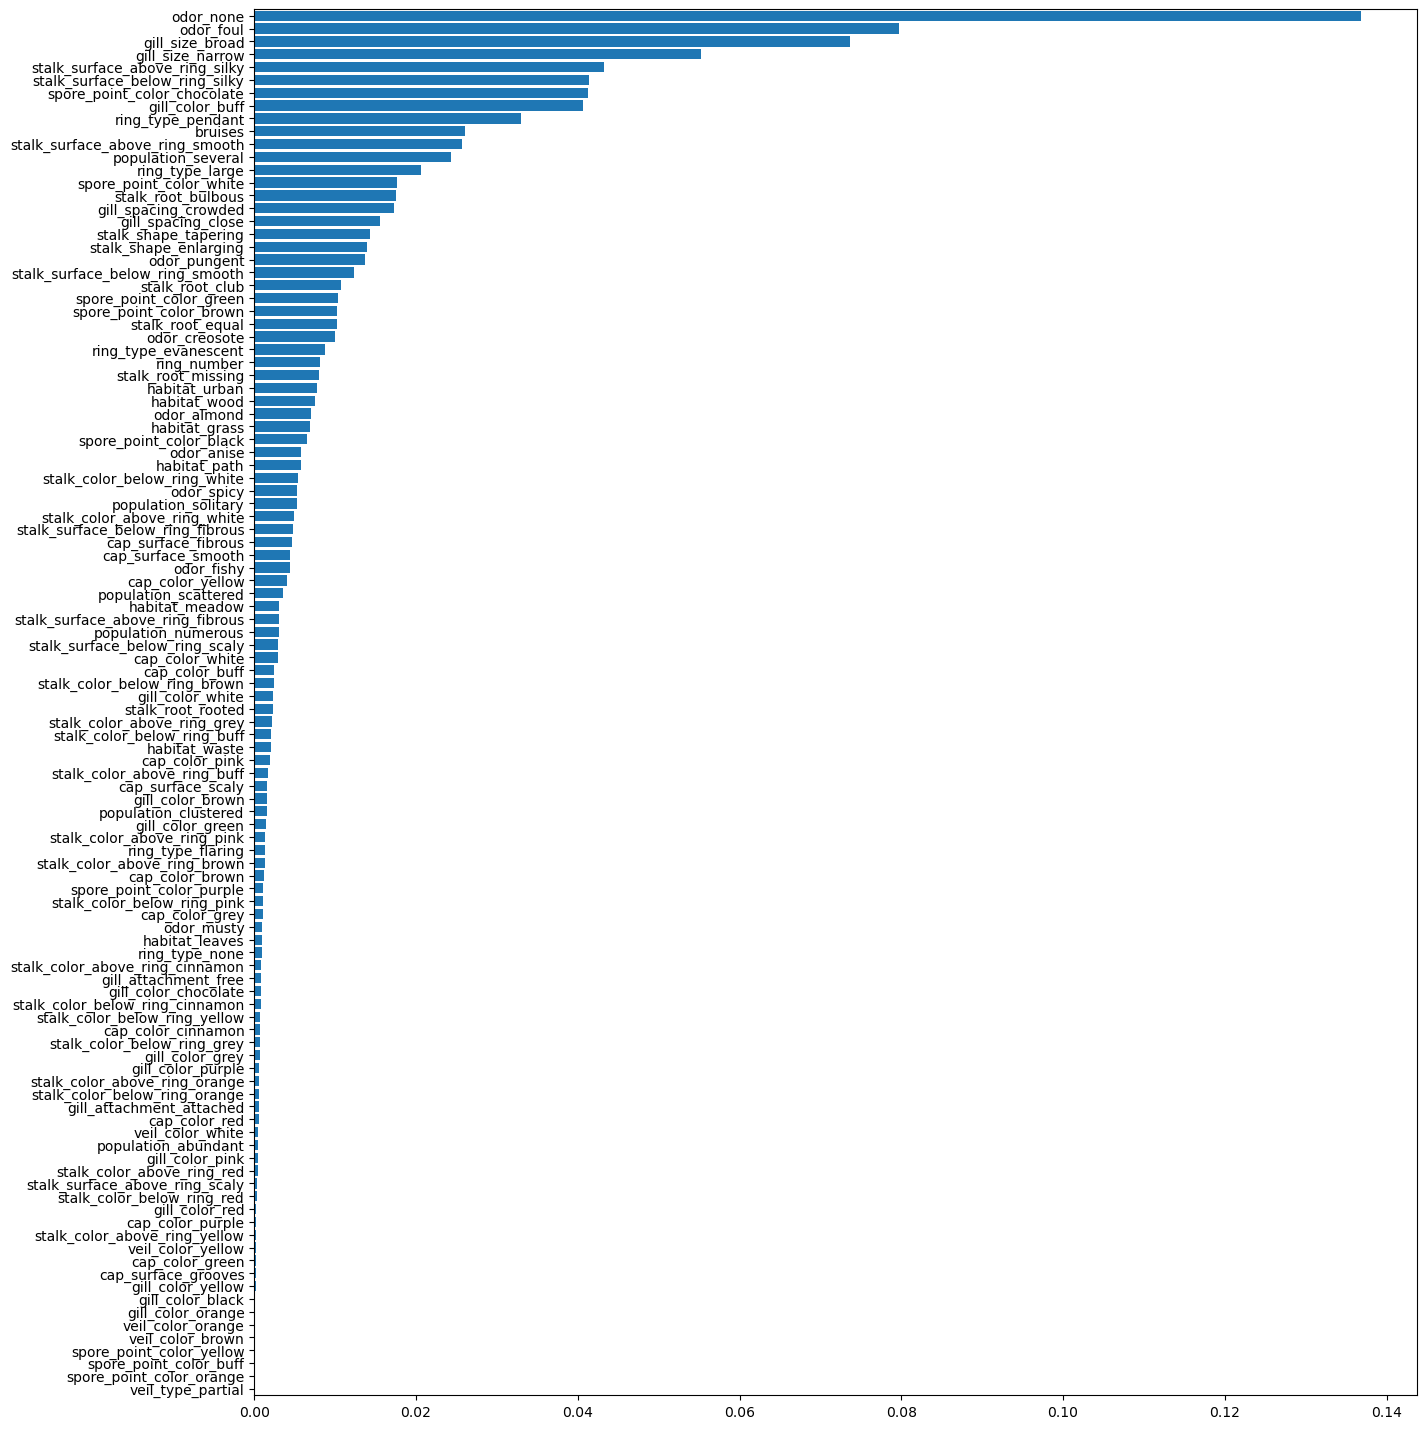

In [14]:
# Plot the feature importances
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(15,18)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

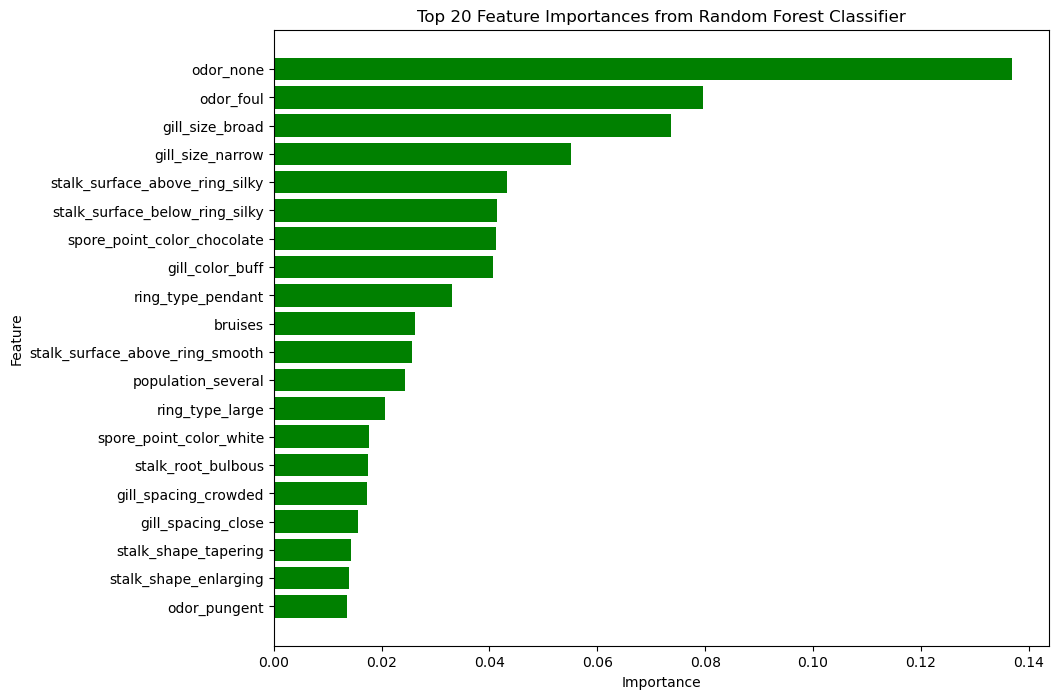

In [15]:
# Truncating the plot for the top 20 feature importances
top_features = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)[:20]
cols = [f[0] for f in top_features]
width = [f[1] for f in top_features]

bar_color = 'green'

fig, ax = plt.subplots()

fig.set_size_inches(10, 8)

ax.barh(y=cols, width=width,color=bar_color)

plt.title('Top 20 Feature Importances from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

In [16]:
# Evaluate the Random Forest Model

y_pred = rfc.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[843   0]
 [  0 782]]


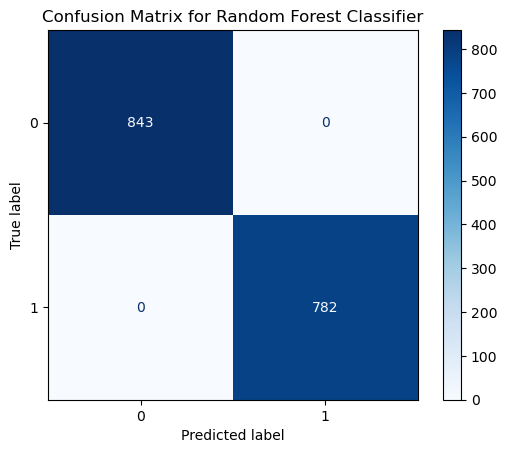

In [17]:
# Compute the confusion matrix for Random Forest Model
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [18]:
# Build the K Nearest Neighbors Model and Train the KNN Model
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


k: 1, Train/Test Score: 1.000/1.000
k: 3, Train/Test Score: 1.000/1.000
k: 5, Train/Test Score: 1.000/1.000
k: 7, Train/Test Score: 1.000/1.000
k: 9, Train/Test Score: 0.999/1.000
k: 11, Train/Test Score: 0.999/1.000
k: 13, Train/Test Score: 0.999/1.000
k: 15, Train/Test Score: 0.999/0.999
k: 17, Train/Test Score: 0.999/0.999
k: 19, Train/Test Score: 0.999/0.999


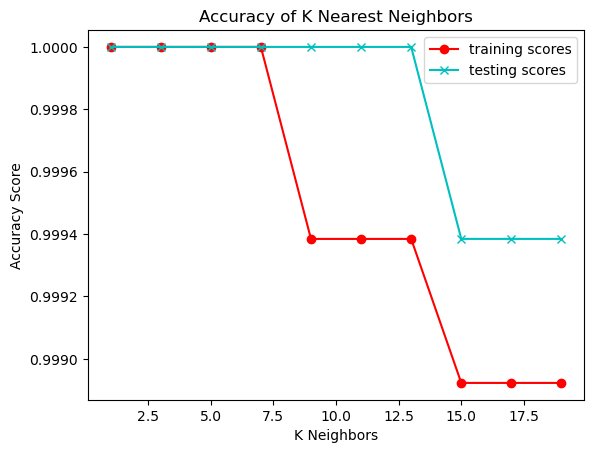

In [19]:
# Plot the results of the KNN Model
plt.plot(range(1, 20, 2), train_scores, color="r", marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, color="c", marker="x", label="testing scores")
plt.title("Accuracy of K Nearest Neighbors")
plt.xlabel("K Neighbors")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

In [20]:
# Evaluate the KNN Model

y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9993846153846154
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[843   0]
 [  1 781]]


In [21]:
# Build the Support Vector Classifier Model 
# Create the support vector machine classifier model with a 'linear' kernel
# Fit the model to the training data
msvc = SVC(kernel='linear',probability=True)
msvc.fit (X_train, y_train)


SVC(kernel='linear', probability=True)

In [22]:
# Evaluate the SVC Model

y_pred = msvc.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[843   0]
 [  0 782]]


c:\Users\revcr\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


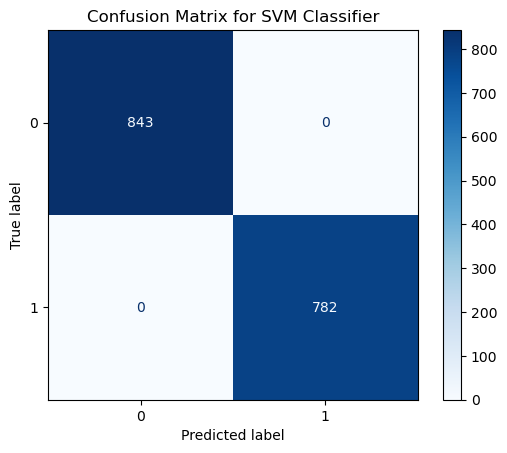

In [23]:
# Plot the confusion matrix for SVC

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=msvc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

In [24]:
# Generate the correlation matrix and find the strongest positive and negative correlations
# Unstack the correlation matrix and filter for positive correlations
# Filter out correlations that are greater than 0 and less than 1 (to exclude self-correlations)

mush_corr = df.corr()
positive_corr = mush_corr.unstack().sort_values(ascending=False)
positive_corr = positive_corr[(positive_corr > 0) & (positive_corr < 1)]

positive_corr_list = list(positive_corr.items())

# Print the list of positive correlations with labels
print("List of positive correlations with labels:")
print(positive_corr_list)

List of positive correlations with labels:
[(('gill_attachment_attached', 'stalk_color_above_ring_orange'), 0.9550973436312871), (('stalk_color_above_ring_orange', 'gill_attachment_attached'), 0.9550973436312871), (('stalk_color_below_ring_orange', 'gill_attachment_attached'), 0.9550973436312871), (('gill_attachment_attached', 'stalk_color_below_ring_orange'), 0.9550973436312871), (('veil_color_white', 'gill_attachment_free'), 0.9352375509363872), (('gill_attachment_free', 'veil_color_white'), 0.9352375509363872), (('stalk_root_missing', 'spore_point_color_white'), 0.8865409947282424), (('spore_point_color_white', 'stalk_root_missing'), 0.8865409947282424), (('spore_point_color_chocolate', 'ring_type_large'), 0.8689302627422747), (('ring_type_large', 'spore_point_color_chocolate'), 0.8689302627422747), (('stalk_surface_below_ring_scaly', 'stalk_root_rooted'), 0.8174442116132162), (('stalk_root_rooted', 'stalk_surface_below_ring_scaly'), 0.8174442116132162), (('spore_point_color_white',

In [25]:
# List of all features used during training
all_features = X_train.columns

# Valid values for each feature
valid_odor_values = ['almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'none', 'pungent', 'spicy']
valid_gill_size_values = ['broad', 'narrow']
valid_population_values = ['abundant', 'clustered', 'numerous', 'scattered', 'several', 'solitary']

# Function to preprocess user input and predict edibility of mushroom
def predict_mushroom_edibility(odor, gill_size, population):
    # Validate input values
    if odor.lower() not in valid_odor_values or gill_size.lower() not in valid_gill_size_values or population.lower() not in valid_population_values:
        return "Invalid Input: Please try again."
    
    # Create a DataFrame with all features, filling with default values
    user_input = pd.DataFrame(np.zeros((1, len(all_features))), columns=all_features)
    
    # Set the user-provided values for one-hot encoded features
    user_input[f'odor_{odor.lower()}'] = 1
    user_input[f'gill_size_{gill_size.lower()}'] = 1
    user_input[f'population_{population.lower()}'] = 1
    
    # Scale the input if necessary
    user_input_scaled = scaler.transform(user_input)  

    # Make prediction
    prediction = rfc.predict(user_input_scaled)
    
    # Convert prediction to human-readable form
    if prediction[0] == 0:
        return "The mushroom is most likely edible."
    else:
        return "The mushroom is most likely poisonous."

# User input demands
odor = input("Enter odor (none or pungent): ")
gill_size = input("Enter gill size (broad or narrow): ")
population = input("Enter population (clustered or solitary): ")

# Predict and display the result
result = predict_mushroom_edibility(odor, gill_size, population)
print(result)

Invalid Input: Please try again.
